In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import csv

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
basedir = '/content/gdrive/MyDrive/ColabNotebooks/00_Data/'
#logdir = f'{basedir}ProjektStudium/logs/Glucose_Data/' + datetime.now().strftime("%Y%m%d-%H%M%S")
#os.makedirs(logdir)

# Read in Data

In [4]:
data_path = f'{basedir}ProjektStudium/Glucose/tblADataRTCGM_Unblinded_RTCGMGroup_2.csv'

In [5]:
df = pd.read_csv(f'{data_path}', delimiter=',')

In [6]:
df.head()

,RecID,PtID,DeviceDtTm,Glucose
0,4376301,152,2000-09-27 03:02:00.000000,124
1,4376302,152,2000-09-27 02:57:00.000000,128
2,4376303,152,2000-09-27 00:52:00.000000,254
3,4376304,152,2000-09-27 00:47:00.000000,254
4,4376305,152,2000-09-27 00:42:00.000000,250


# Analyse Data

Uniques vals

In [ ]:
for col in df.columns:
  unique_count = df[col].nunique()
  print('Col: ', col)
  print('Unique values: ', unique_count)
  print()

Col:  RecID
Unique values:  999560

Col:  PtID
Unique values:  18

Col:  DeviceDtTm
Unique values:  763985

Col:  Glucose
Unique values:  470



Patient numbers

In [ ]:
print('Patients in this dataset: ', df['PtID'].unique())

Patients in this dataset:  [152 153 154 156 157 158  16 161 163 165 167 168 169 177 181 183 185 186]


Numer of eintraege per patient

In [ ]:
val_count = df['PtID'].value_counts()

val_count

185    92518
177    84182
154    84130
169    78226
163    74584
158    72943
167    62655
156    61240
16     58605
168    53716
161    52211
157    51897
152    46750
165    46373
183    36544
186    23517
181    18247
153     1222
Name: PtID, dtype: int64

## Time Ranges: Single Patient

Check time ranges, can they be grouped?

In [ ]:
# check type
type(df['DeviceDtTm'][0])

str

In [ ]:
# e.g. patient 153
DtTm_153 = df.loc[df['PtID'] == 153, 'DeviceDtTm']
uq_153 = DtTm_153.nunique()
tot_153 = len(DtTm_153)

print('Total datapoints: ', tot_153)
print('Unique datapoints: ', uq_153)

Total datapoints:  1222
Unique datapoints:  1222


From this we know the time points are very specific

In [ ]:
all_dt = []

for DtTm in DtTm_153:
  dt = datetime.strptime(DtTm, '%Y-%m-%d %H:%M:%S.%f')
  all_dt.append(dt)

dt_array = np.array(all_dt, dtype='datetime64')
years = np.array(dt_array, dtype='datetime64[Y]')
months = np.array(dt_array, dtype='datetime64[M]')
days = np.array(dt_array, dtype='datetime64[D]')
hours = np.array(dt_array, dtype='datetime64[h]')
minutes = np.array(dt_array, dtype='datetime64[m]')

In [ ]:
print('years: ', np.unique(years))
print('months: ', np.unique(months))
print('n days: ', len(np.unique(days)))
print('n hours: ', len(np.unique(hours)))
print('n mins: ', len(np.unique(minutes)))
print()
print('Total datapoints: ', tot_153)

years:  ['2000']
months:  ['2000-04']
n days:  8
n hours:  133
n mins:  1222

Total datapoints:  1222


Minutes are all unique, too precise; let's look at the time of day the measurements were taken

In [ ]:
#ignore 
hours_153 = pd.DatetimeIndex(dt_array).hour

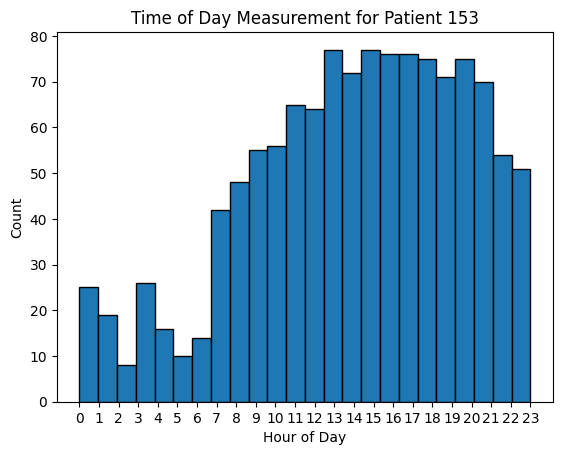

In [ ]:
plt.hist(hours_153, bins=24, edgecolor='black')
plt.xticks(range(24))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Time of Day Measurement for Patient 153')
plt.show()

## Time Ranges: All

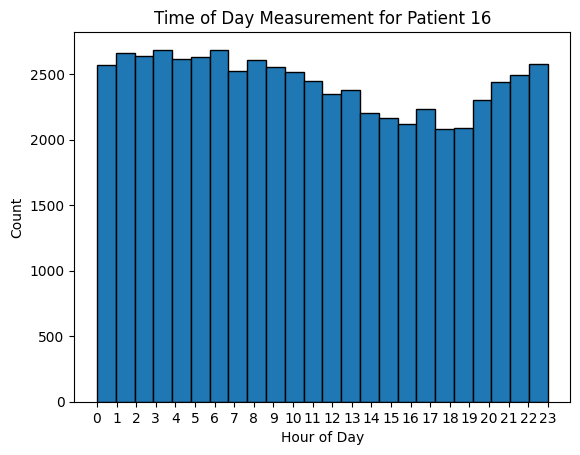

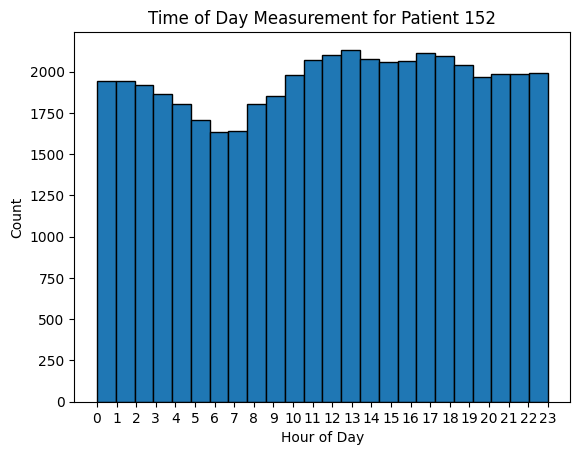

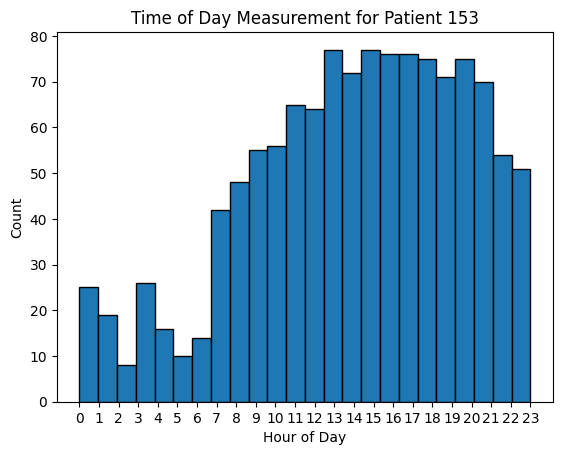

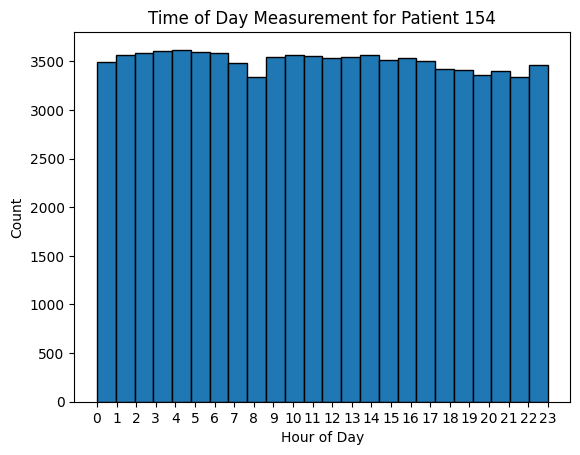

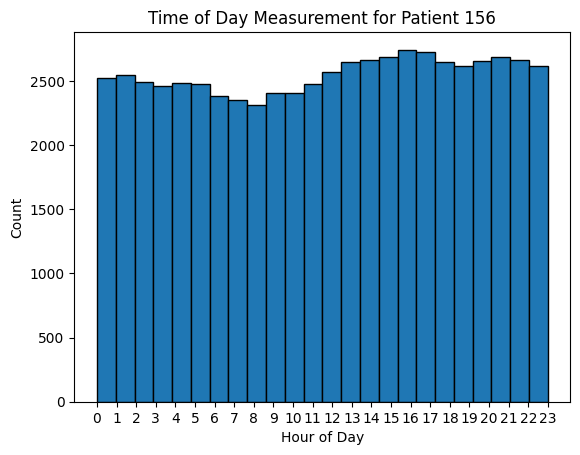

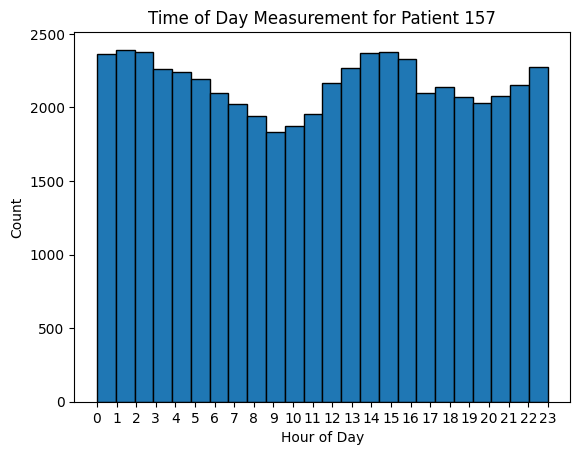

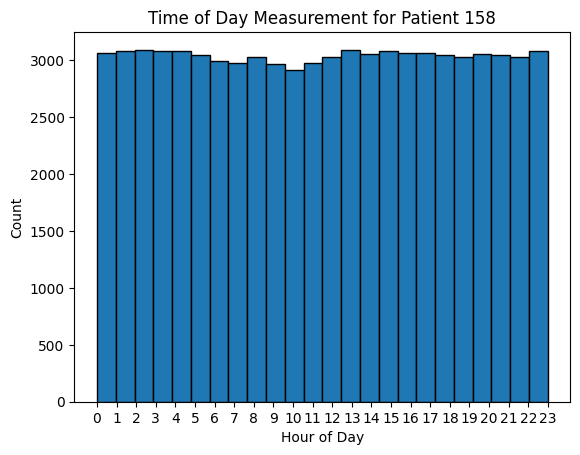

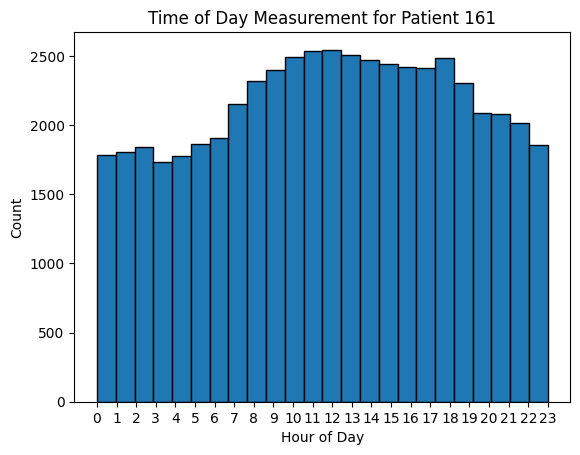

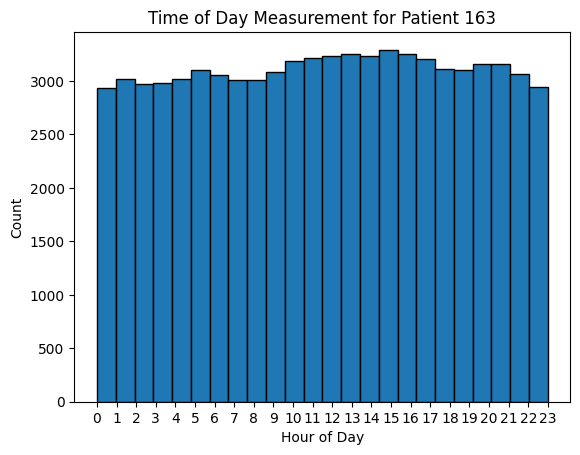

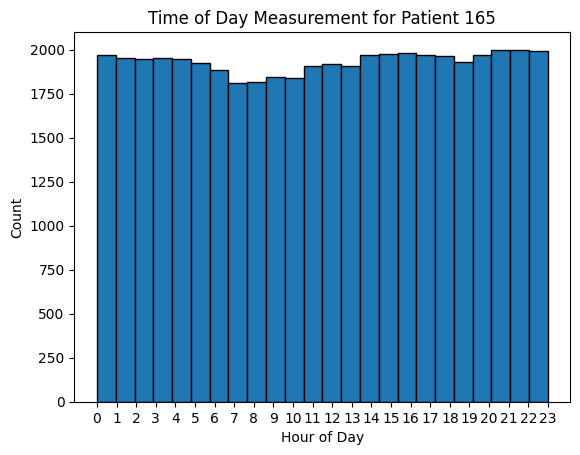

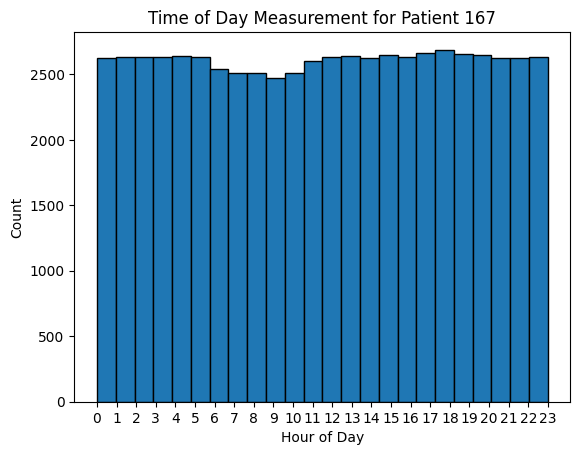

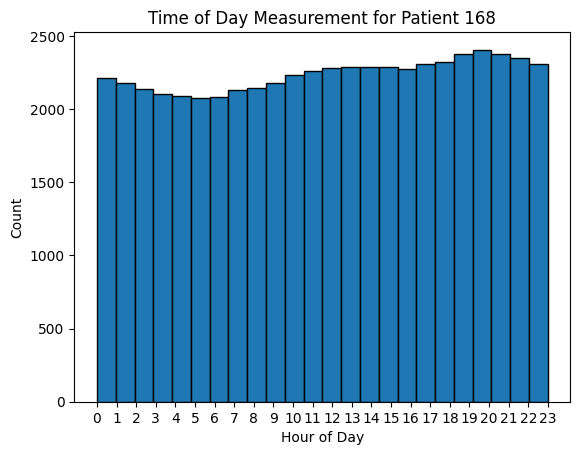

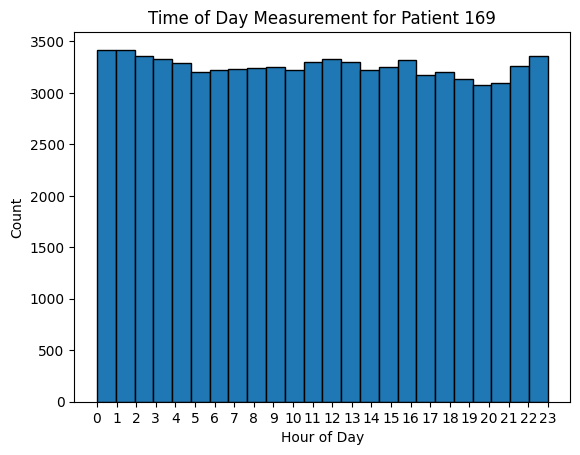

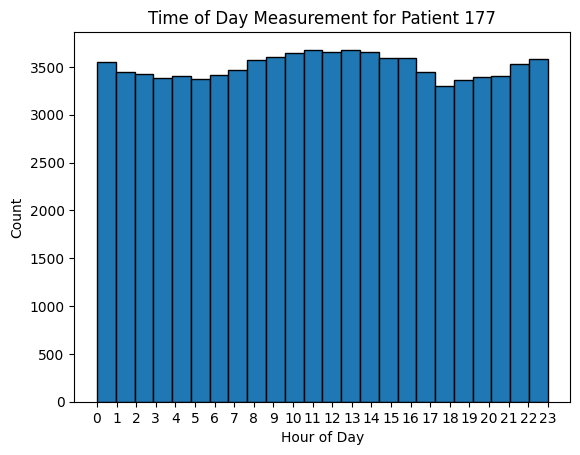

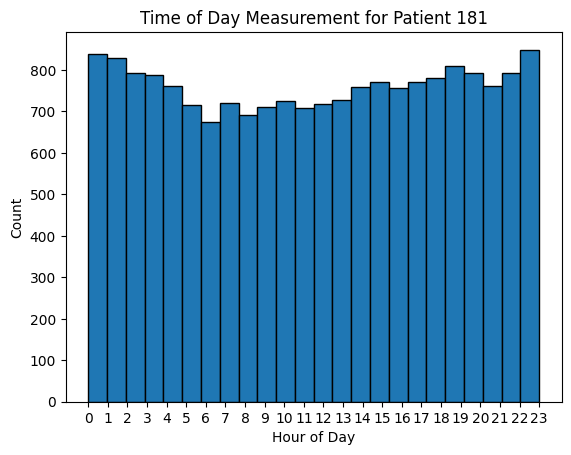

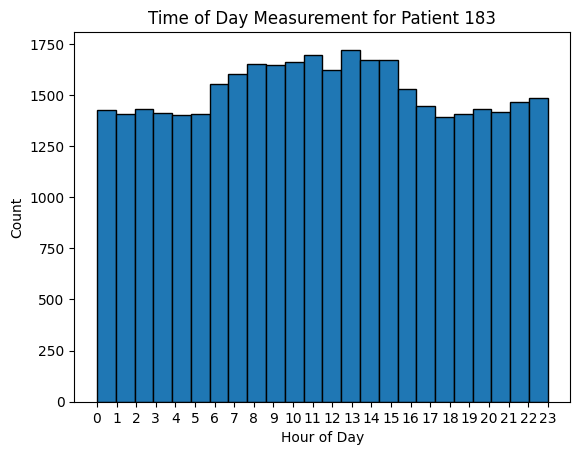

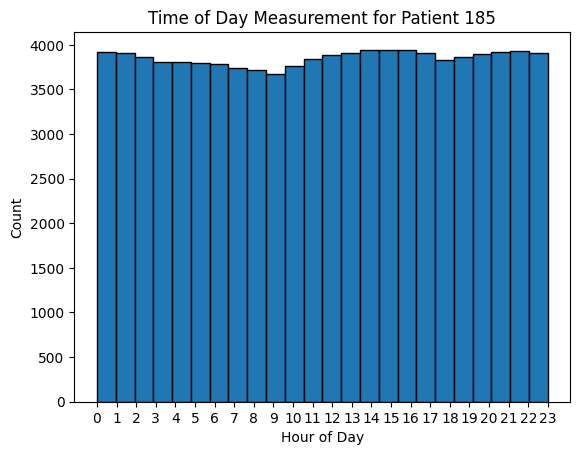

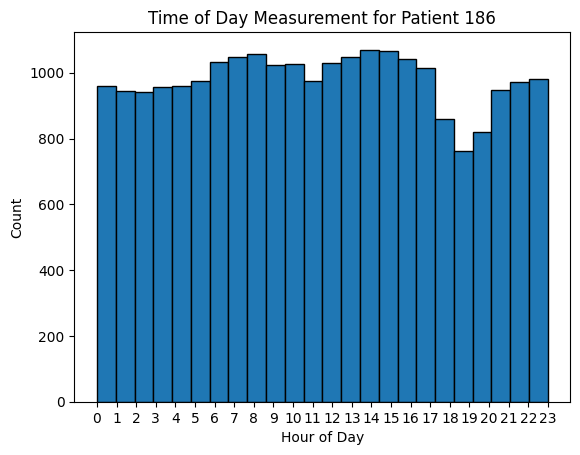

In [ ]:
patients = df.groupby('PtID')

for id, pat in patients:
  dt = pd.to_datetime(pat['DeviceDtTm'].values)
  plt.hist(dt.hour, bins=24, edgecolor='black')
  plt.xticks(range(24))
  plt.xlabel('Hour of Day')
  plt.ylabel('Count')
  plt.title(f'Time of Day Measurement for Patient {id}')
  plt.show()

Consistent readings for most patients, with the exception of 153, who seems to not have many readings during the night.

## Plotting Glucose Levels

In [24]:
df['DeviceDtTm'] = pd.to_datetime(df['DeviceDtTm'])

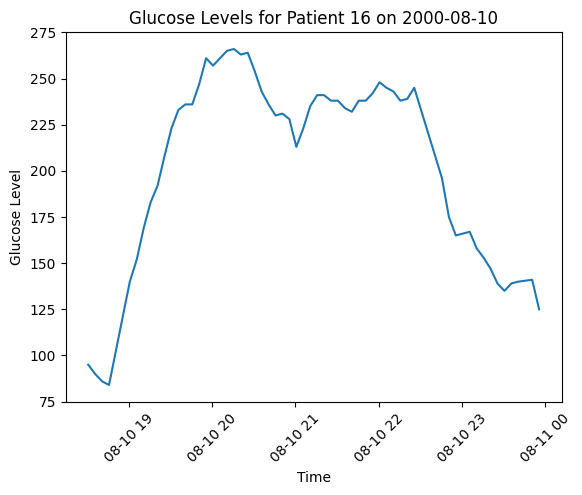

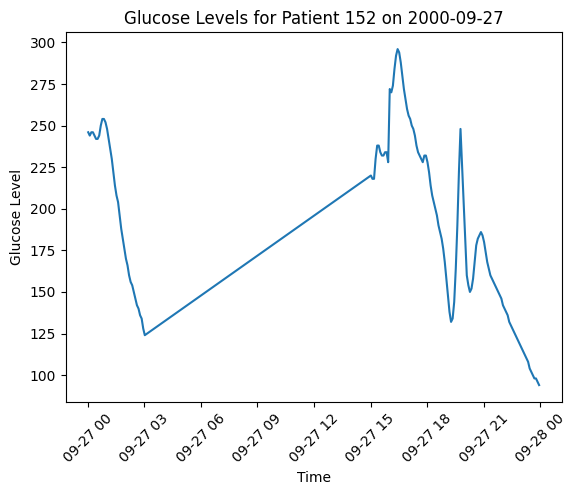

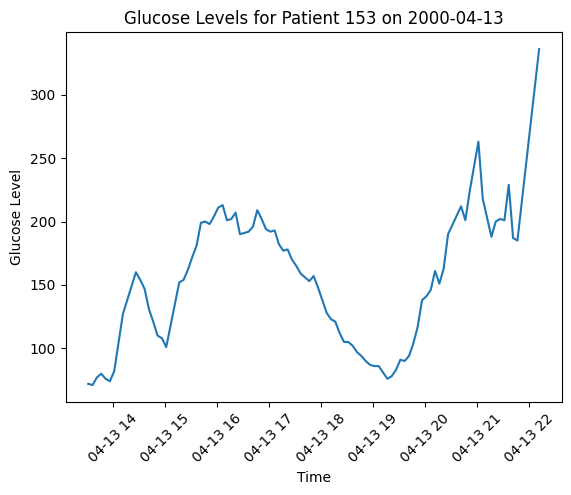

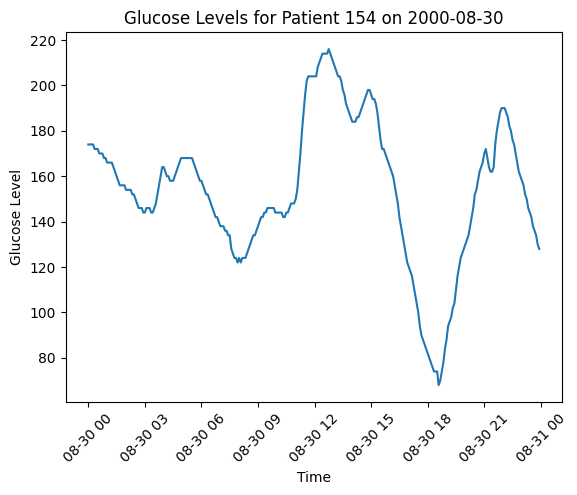

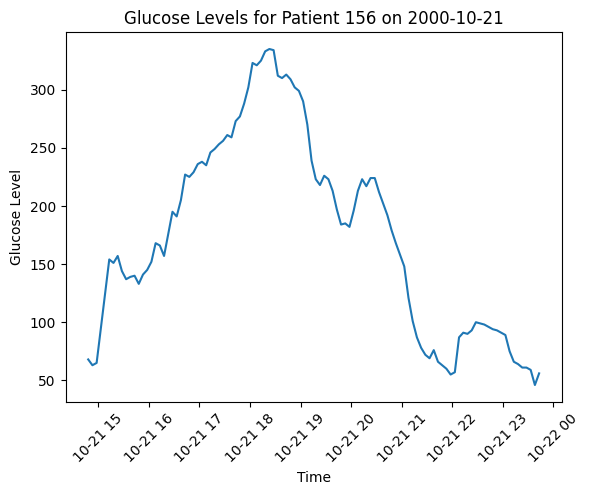

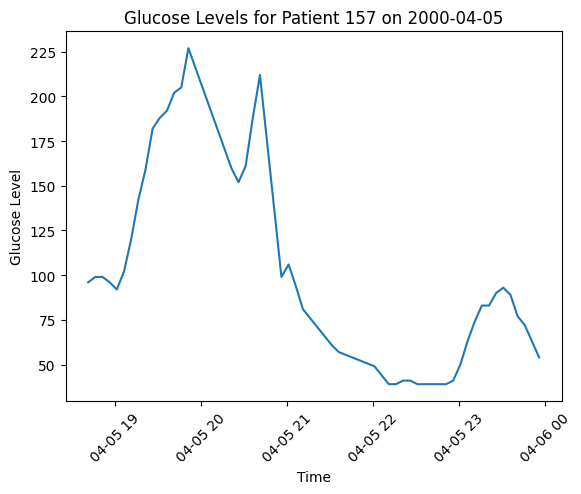

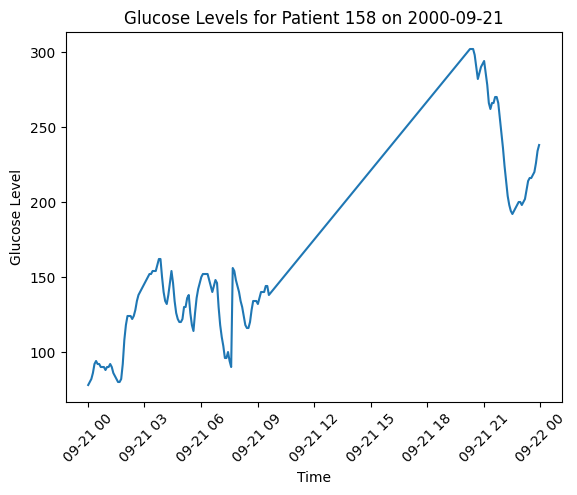

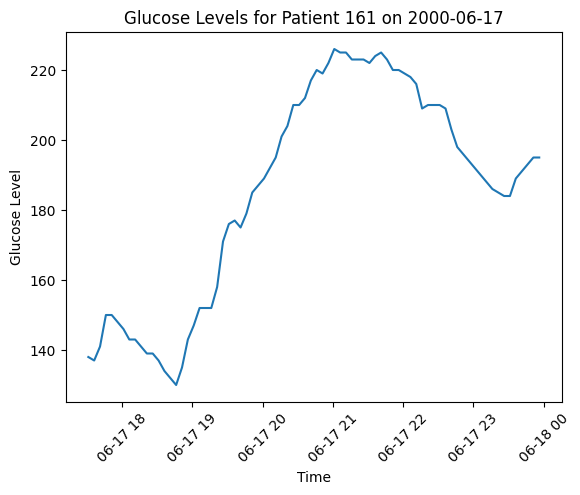

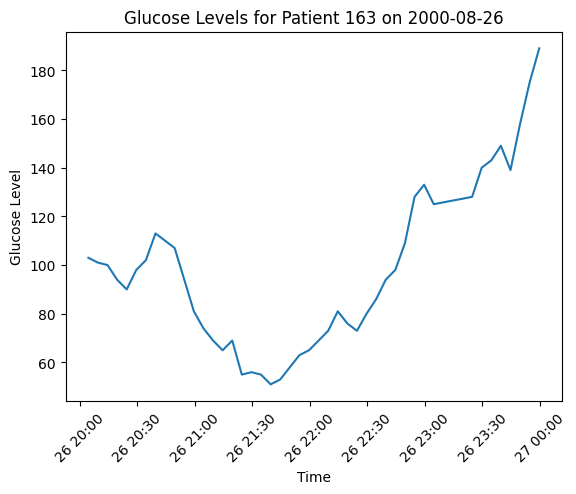

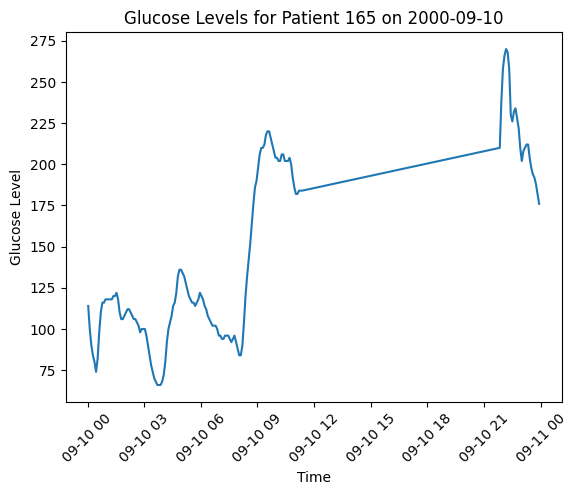

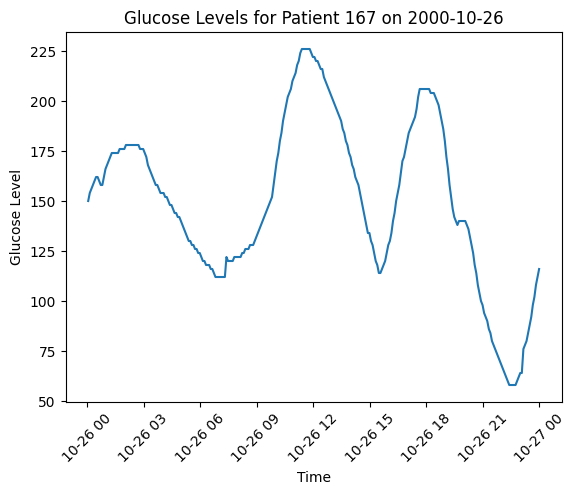

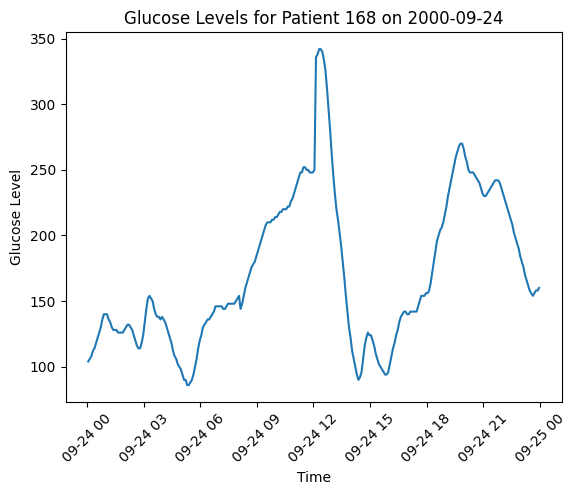

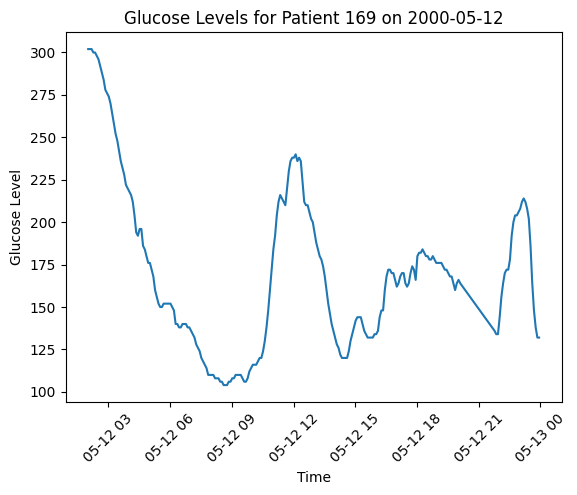

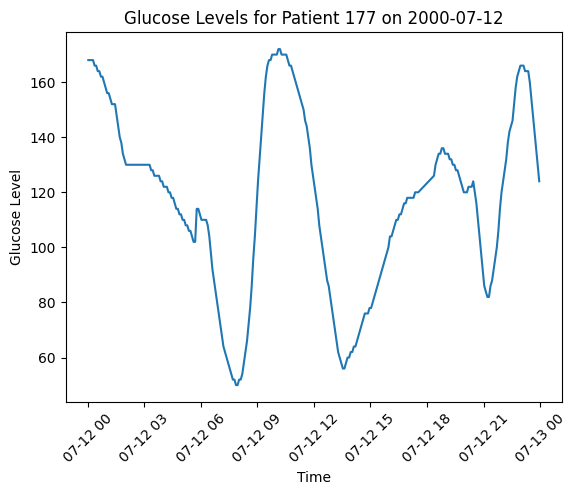

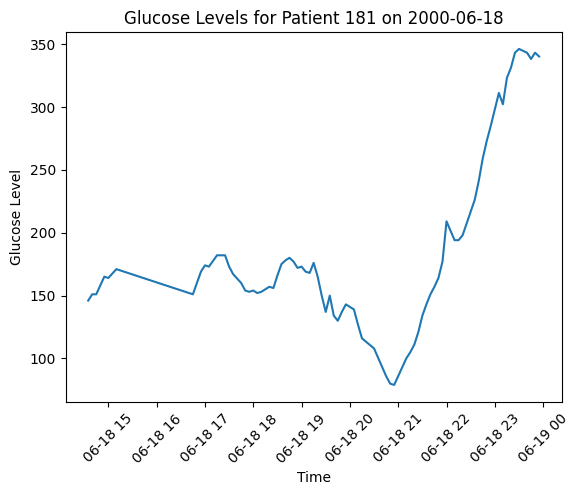

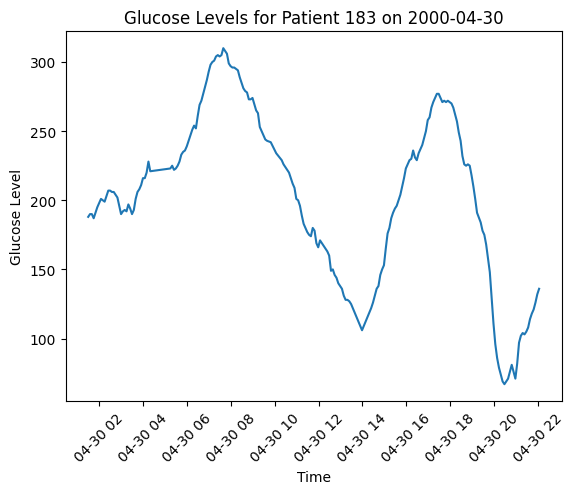

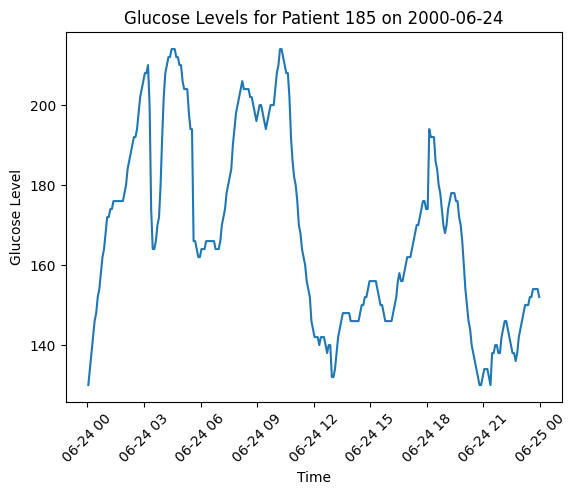

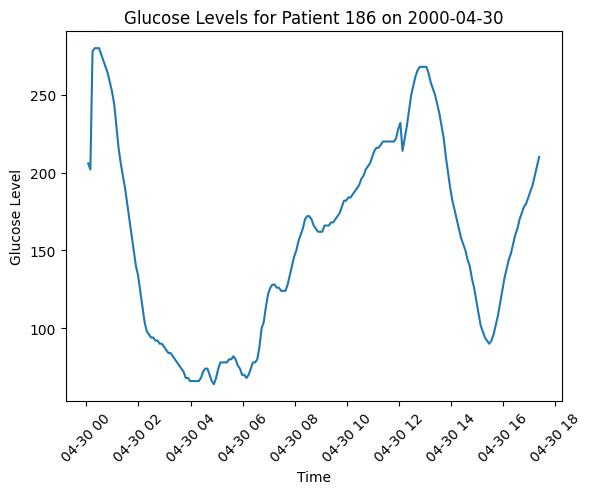

In [54]:
# First day
first_days = df.groupby('PtID')['DeviceDtTm'].first()

for patient, first_day in first_days.items():
    patient_data = df[(df['PtID'] == patient) & (df['DeviceDtTm'].dt.date == first_day.date())]
    patient_data = patient_data.sort_values(by='DeviceDtTm')


    plt.plot(patient_data['DeviceDtTm'], patient_data['Glucose'])
    plt.title(f'Glucose Levels for Patient {patient} on {first_day.date()}')
    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.ylabel('Glucose Level')
    plt.show()

Note that there are some patients that have missing chunks of time.